In [40]:
import networkx as nx
import numpy as np
import scipy

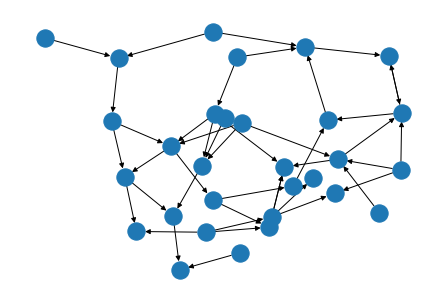

In [41]:
n = 30
g = nx.erdos_renyi_graph(n, 0.05, directed=True, seed=123)
nx.draw(g, pos=nx.kamada_kawai_layout(g))

In [42]:
rank_networkx = nx.pagerank(g)

In [43]:
def random_surfer_pagerank(g, alpha = 0.85, timesteps = 100):
    """
    Perform a random surfer simulation on a given graph to find pagerank
    Parameters:
    g : NetworkX graph
        Input graph
    alpha : float
        Probablility that the surfer follows the path in g. 
        Must be between 0 and 1
        Default = 0.85
    timesteps : int
        Number of iterations to run the simulation. 
        Must be chosen based on the size of input graph
        Default = 100
    """
    ranks = np.zeros(g.number_of_nodes())
    curr_node = np.random.choice(list(g.nodes()))
    for j in range(timesteps):
        if np.random.uniform() <= alpha and list(g.neighbors(curr_node)):
            next_node = np.random.choice(list(g.neighbors(curr_node)))
        else:
            next_node = np.random.choice(list(g.nodes()))
        ranks[next_node] += 1
        curr_node = next_node
    pagerank = ranks/np.sum(ranks)
    return pagerank


In [44]:
errors = []
for iteration in range(0, 10000, 100):
    diff = []
    pagerank = random_surfer_pagerank(g, timesteps=iteration)
    for i in range(n):
        diff.append(abs(rank_networkx[i]-pagerank[i]))
    errors.append(np.mean(diff))

C:\Users\JATINK~1\AppData\Local\Temp/ipykernel_38604/478959185.py:25: RuntimeWarning: invalid value encountered in true_divide
  pagerank = ranks/np.sum(ranks)


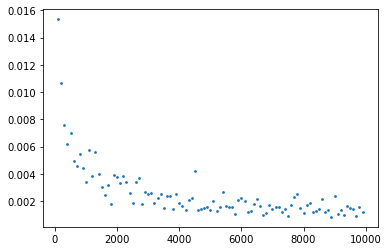

In [46]:
import matplotlib.pyplot as plt
x = [i for i in range(0, 10000, 100)]
plt.figure()
plt.scatter(x,errors,s=3)
plt.show()